In [2]:
import MulensModel as mm
import numpy as np
t_0 = 507.82
u_0 = 0.5425
#u_0 = np.linspace(-0.015,0.020,900)
t_E = 62.63
gamma = 4.0
s = 1.35
q = 0.00578
alpha = (-180 + 49.58)
rho = 0.0098
dc = 1. - 3*q**(1./3.)/4.
dw = 1. + 3.*q**(1./3.)/2.
pspl = mm.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E})
planet = mm.Model( {'t_0': t_0, 'u_0': u_0, 't_E': t_E, 's': s, 'q': q, 'alpha': alpha,
     'rho': rho})
planet.set_magnification_methods([t_0 - gamma*t_E, 'VBBL', t_0 + gamma*t_E])
#print(dc,dw)

In [145]:
class MyBinaryLens(mm.BinaryLens):
    def __init__(self, q, s):
        super().__init__(1./(1.+q), q/(1.+q), s)

    def get_n_images(self, x, y):
        """
        Give number of images of a point source
        """
        shift = -self.separation / (1. + self.mass_2 / self.mass_1)
        return len(self._verify_polynomial_roots(x + shift, y))
    

def get_image_nos(mbl, traj):
    n_images = []
    for i in range(len(traj.x)):
        x, y = traj.x[i], traj.y[i]
        n_images.append(mbl.get_n_images(x, y))
    return n_images

Magnification Maps

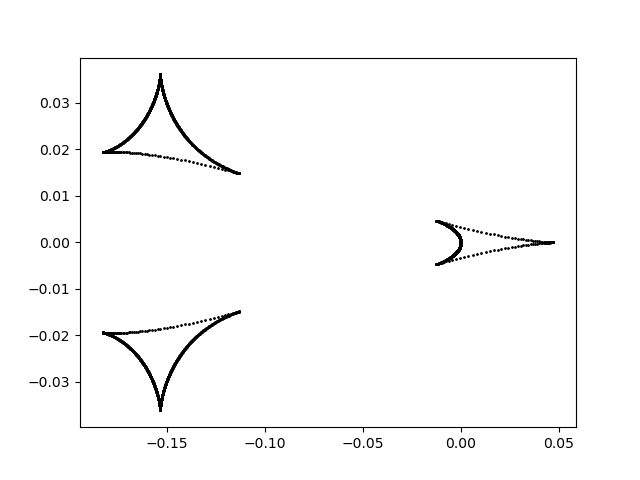

In [7]:
#planet caustics
import matplotlib.pyplot as plt
import MulensModel as mm
%matplotlib widget
s = 0.926
q = 0.00052
planet_caustics = mm.Caustics(s=s, q=q)
causticx, causticy = planet_caustics.get_caustics()
plt.figure()
plt.scatter(causticx, causticy, color='black', s=1)
plt.show()



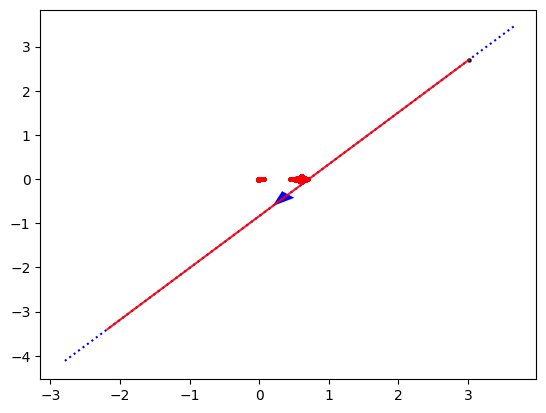

In [3]:
import matplotlib.pyplot as plt
plt.figure()

planet.plot_trajectory(t_range=[t_0 - 5.0*t_E, t_0 + 5.0*t_E], color='blue', linestyle=':',
                       caustics=True, arrow=True)
salpha = np.sin(np.radians(alpha))
calpha = np.cos(np.radians(alpha))
t_range=np.linspace(t_0-4*t_E, t_0+4*t_E, 10000)
tau = (t_range - t_0)/t_E
y1s = -u_0 * salpha + tau * calpha  # source positions
y2s = u_0 * calpha + tau * salpha
plt.plot(y1s, y2s, linestyle = '-', color = "red", alpha = 0.9)
plt.scatter(y1s[0], y2s[0], color='black', alpha = 0.9, marker='o', s=5)
plt.show()




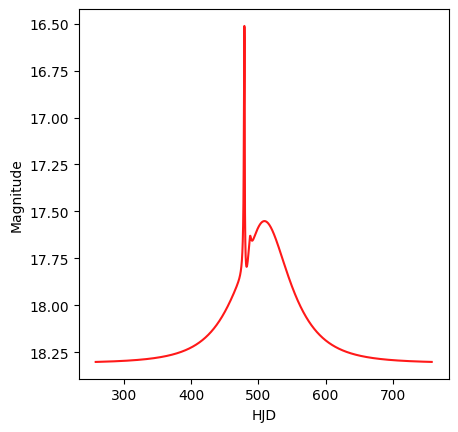

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

psplmag = pspl.get_magnification(t_range)
planetmag = planet.get_lc(t_range, source_flux=30.0, blend_flux=0.0)

diffmag = (planetmag - psplmag)/psplmag
#plt.plot(t_range, psplmag, linestyle = ':', color = "blue", label='Single Lens')
plt.plot(t_range, planetmag, linestyle = '-', color = "red", alpha = 0.9)
plt.xlabel('HJD')
plt.ylabel('Magnitude')
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ratio = 1./1.
ax.set_aspect(abs((x_right - x_left) / (y_high - y_low))*ratio)
#invert y axis
ax.invert_yaxis()
#plt.title('u0 = %.3f, s = %0.2f, q = %0.3f, rho = %0.3f, alpha = %0.1f'%(u_0,s,q,rho, alpha))
#plt.legend(loc='best')

In [26]:
dt[peaks], phot[peaks]

(array([479.03237324, 487.65112311, 508.94745275]),
 array([16.51249894, 17.62915172, 17.55111895]))

10000


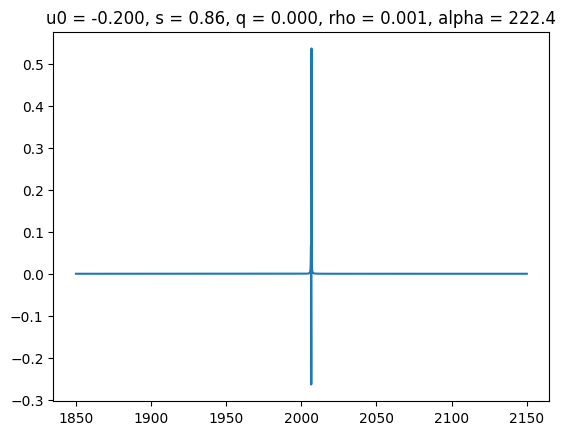

In [3]:
import numpy as np
time = np.linspace(t_0 - 5.0*t_E, t_0 + 5.0*t_E, 10000)
planetmag = planet.get_magnification(time)
psplmag = pspl.get_magnification(time)
print(len(planetmag))
diffmag = (planetmag - psplmag)/psplmag
plt.figure()
plt.plot(time, diffmag)
plt.title('u0 = %.3f, s = %0.2f, q = %0.3f, rho = %0.3f, alpha = %0.1f'%(u_0,s,q,rho, alpha))
plt.show()

In [17]:
#write planet mag to a file
import astropy.io.fits as fits
hdu = fits.PrimaryHDU(planetmag)
hdu.writeto('planetmag.fits',overwrite=True)


Plot caustics
Star regime: q = 0-1 , 20 steps

s = 0.50 - 2
u0 = (-2,2)
u0inc = 1e-2
factor = 2
time factor = 2x5

s = 0.1 - 0.50
u0 = (-3, 3)
u0inc = 1e-3
factor=5
time factor = 5x2

s=2-6
u0 = (-3, 3)
u0inc  = 1e-3
factor = 3
time factor = 3x2

s=6-10
u0 = (-6, 6)
$\tau^2 < 36 - u_0^2$ if |u_0| > 3
$\tau = (-\sqrt{36 - u_0^2}, -\sqrt{9 - u_0^2})U(\sqrt{9 - u_0^2}, \sqrt{36 - u_0^2})$
u0inc = 1e-3
factor=5
time factor = 5x2








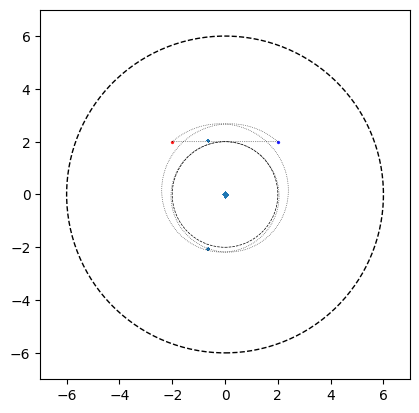

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import MulensModel as mm

class MyBinaryLens(mm.BinaryLens):
    """Custom BinaryLens class potentially for modifications or extensions."""
    def __init__(self, q, s):
        # Initialize the parent MulensModel.BinaryLens
        # Calculates mass fractions m1, m2 from q
        super().__init__(mass_1=1./(1.+q), mass_2=q/(1.+q), separation=s)

    def get_n_images(self, x, y):
        """
        Calculates the number of images for a source at position (x, y).
        Relies on the _verify_polynomial_roots method from the parent class.
        """
        # Shift accounts for the coordinate system center (usually barycenter)
        shift = -self.separation / (1. + self.mass_2 / self.mass_1)
        # The length of the list of roots corresponds to the number of images
        return len(self._verify_polynomial_roots(x + shift, y))
    
fig, ax = plt.subplots()
u0i = -2 # Initial position of the source trajectory
u0f = 2 # Final position of the source trajectory
gamma = 1.0
u0inc = 1e-3 #2e-3
tauinc = 1e-3
tstart = -2 # Start time of the source trajectory
tstop = 2 # End time of the source trajectory
n = int((u0f - u0i)/u0inc)
nt = int((tstop - tstart)/tauinc)
factor = 2
t0 = 2000.0
tE = 30.0
u0l = [ 2]  #, -0.7419, -0.7168, -0.7118, -0.6767, -0.6717, -0.6366, -0.6291, -0.4937, -0.4837, -0.4461, -0.4311, -0.4160, 0.4211, 0.4361, 0.4511, 0.4787, 0.4887, 0.6341, 0.6416, 0.6767, 0.6817, 0.7168, 0.7218, 0.7469, 1.0602]#np.linspace(u0i,u0f, n) #Positions of the source trajectory
alphal = [0]
s = 0.42
q = 0.5
tn= np.linspace(tstart, tstop, int(nt))
binarycaustic = mm.Caustics(s=s, q=q)
causticx, causticy = binarycaustic.get_caustics()
#binarymodel = mm.Model(s=s, q=q)
binarycaustic.plot(linestyle='-', s = 0.7)
#planet.plot_trajectory(t_range=[t_0 - gamma*t_E, t_0 + gamma*t_E])
period = 60
w = 2 * np.pi / period if period is not None else 0 # Angular velocity, default to 0 if not provided
dalphadt = -(w)
tlist = tn*tE + t0
for alpha in alphal:
    alphar = np.radians(alpha) + dalphadt*(tlist - tlist[0])
    alphax = np.radians(alpha)
    for u0 in u0l:
        xtraj = -u0*np.sin(alphar) + tn*np.cos(alphar)
        ytraj = u0*np.cos(alphar) + tn*np.sin(alphar)
        xtrajo = -u0*np.sin(alphax) + tn*np.cos(alphax)
        ytrajo = u0*np.cos(alphax) + tn*np.sin(alphax)
        plt.plot(xtraj, ytraj, color='black', alpha = 0.8, linestyle=':', linewidth=0.5)
        plt.plot(xtrajo, ytrajo, color='black', alpha = 0.8, linestyle=':', linewidth=0.5)
        plt.scatter(xtrajo[0], ytrajo[0], color='red', alpha = 0.8, marker='o', s=2)
        plt.scatter(xtraj[-1], ytraj[-1], color='blue', alpha = 0.8, marker='o', s=2)


#planet.plot_caustics(color='purple', linestyle='-', s = 1.7)
#planet.plot_trajectory(t_range=[t_0 - gamma*t_E, t_0 + gamma*t_E], 
                       #caustics=False, arrow=False, color='blue', linestyle=':') 

#zoom into (-2,0)
#xtraj = -u_0*np.sin(alpha_r) + tn*np.cos(alpha_r)
#ytraj = u_0*np.cos(alpha_r) + tn*np.sin(alpha_r)
#plt.plot(xtraj[:2500], ytraj[:2500], color='black', linestyle=':')

#plot planet and star positions
#plt.scatter([0], [0], color='yellow', s = 20)
#plt.scatter([s], [0], color='black', s = 10)
#plt.scatter([0], [0], color='black', s = 10)
#binarymodel.plot_source(color='black')

#draw einstein ring
circle1 = plt.Circle((0, 0), 2., color='black', fill=False, linestyle='--', linewidth=0.5)
plt.gca().add_artist(circle1)
circle2 = plt.Circle((0, 0), 6, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle2)
circle3 = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
#plt.gca().add_artist(circle3)

#plt.title('u0 = %.3f, s = %0.2f, q = %0.3f, rho = %0.3f, alpha = %0.1f'%(u_0,s,q,rho, alpha))
plt.ylim(-7, 7)
plt.xlim(-7, 7)

x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ratio = 1./1.
ax.set_aspect(abs((x_right - x_left) / (y_high - y_low))*ratio)
plt.show()

In [94]:
filenameq = '../Temp/cross_section_qavg_stest10.00.txt'
q_loaded, q_avgs_loaded, all_q_avg_history = np.array([]), np.array([]), np.array([])
q_load, q_avgs, q_avg_history = np.loadtxt(filenameq, dtype=float, unpack=True)
q_loaded, q_avgs_loaded, all_q_avg_history = np.append(q_loaded, q_load), np.append(q_avgs_loaded, q_avgs), np.append(all_q_avg_history, q_avg_history)
if len(all_q_avg_history) > 0:
    qavgcrssum = all_q_avg_history[-1] * len(q_avgs_loaded[q_avgs_loaded != 0.]) # last average * number of non-zero q averages
    nq_processed_before = len(all_q_avg_history)
    print(f"Loaded {nq_processed_before} previous q averages from {filenameq}")

Loaded 1 previous q averages from ../Temp/cross_section_qavg_stest10.00.txt


In [125]:
total_crs = 0
i = 0
while i < len(u0l)-1:
    print(u0l[i], u0l[i+1], "\n")
    total_crs+= u0l[i+1] - u0l[i]
    i += 2
   
    
print(total_crs)
    

-1.4447 -0.267 

-0.2655 -0.253 

-0.2515 -0.239 

-0.2365 -0.225 

-0.2215 -0.211 

-0.2075 -0.197 

-0.1925 -0.183 

-0.1785 -0.169 

-0.1635 -0.155 

-0.1495 -0.141 

-0.1355 -0.127 

-0.1215 -0.113 

-0.1065 -0.099 

-0.0925 -0.085 

-0.0785 -0.071 

-0.0645 -0.057 

-0.0505 -0.042 

-0.0365 -0.028 

-0.0225 -0.014 

-0.0085 0.0 

0.0055 0.015 

0.0195 0.029 

0.0335 0.8571 

0.8676 0.8861 

0.8926 1.4292 

2.7499000000000002


alpha - angle between trajectory and binary axis (arrow from primary to secondary, i.e., left to right)
d(alpha)/dt = -w (if rotation is clockwise)
              +w (if rotation is counter-clockwise)

u0 does not change (center of mass does not move)


In [33]:
%matplotlib widget

--- plot_caustics called with s=2.000, q=1.000 ---
Clearing axes...
Axes cleared.
Creating Caustics object...
Caustics object created: <class 'MulensModel.caustics.Caustics'>
Setting current axes to: Axes(0.1,0.25;0.8x0.63)
Calling binarycaustic.plot() (without ax arg)...
binarycaustic.plot() finished.
Setting fixed axis limits: X=(-6, 6), Y=(-6, 6)
Axis limits set.
--- plot_caustics finished successfully ---


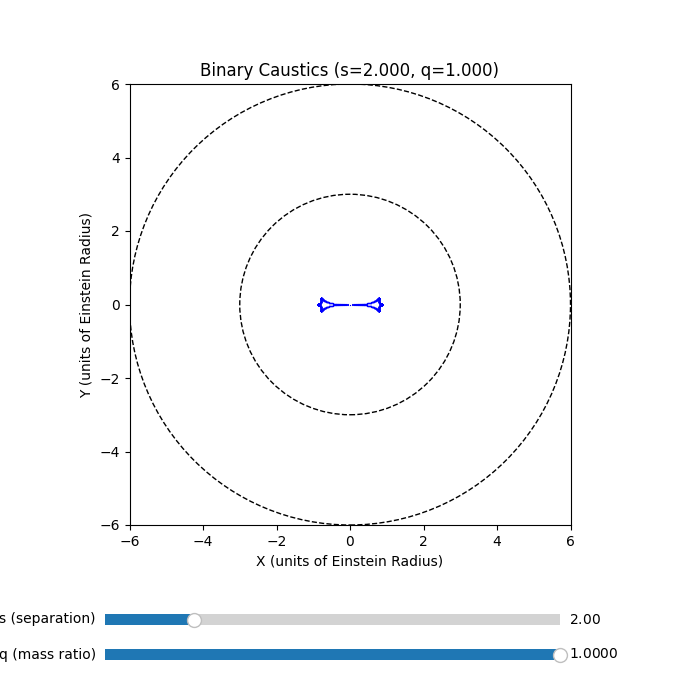

In [35]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
try:
    import MulensModel as mm
except ImportError:
    print("Error: MulensModel library not found.")
    print("Please install it, e.g., using 'pip install MulensModel'")
    mm = None # Set mm to None to handle the error gracefully later

# 1. Define the initial parameters
initial_s = 2.00  # Replace with your desired initial 's' (separation)
initial_q = 1.00 # Replace with your desired initial 'q' (mass ratio)

# --- Define ranges for sliders (Adjust these based on your needs) ---
s_min, s_max = 0.05, 10
q_min, q_max = 0.0001, 1
# --------------------------------------------------------------------

# --- Define FIXED axis limits (Adjust these based on expected caustic size) ---
AXIS_XLIM = (-6, 6)
AXIS_YLIM = (-6, 6)
# -----------------------------------------------------------------------------

# 2. Create the figure and the main axes for the plot
#    'ax' stores the main plotting area object.
fig, ax = plt.subplots(figsize=(7, 7))
plt.subplots_adjust(left=0.1, bottom=0.25)

# 3. Helper function to plot caustics
def plot_caustics(s_val, q_val, target_ax):
  """
  Clears the target axes, creates a new Caustics object with
  given s and q, plots it (by setting current axes first),
  and resets axis properties including limits.
  """
  print(f"--- plot_caustics called with s={s_val:.3f}, q={q_val:.3f} ---") # DEBUG
  if mm is None: # Check if MulensModel was imported successfully
      target_ax.text(0.5, 0.5, "MulensModel not loaded", color='red', ha='center', va='center', transform=target_ax.transAxes)
      print("!!! MulensModel not loaded, aborting plot !!!") # DEBUG
      return

  print("Clearing axes...") # DEBUG
  target_ax.clear()
  print("Axes cleared.") # DEBUG

  try:
    q_val = q_val
    print("Creating Caustics object...") # DEBUG
    binarycaustic = mm.Caustics(s=s_val, q=q_val)
    print(f"Caustics object created: {type(binarycaustic)}") # DEBUG

    # *** Set the main plot axes as the CURRENT axes ***
    print(f"Setting current axes to: {target_ax}") # DEBUG
    plt.sca(target_ax)
    # **************************************************

    print("Calling binarycaustic.plot() (without ax arg)...") # DEBUG
    # Plot the caustics - it should now plot on target_ax because we set it current
    binarycaustic.plot(linestyle='-', s=0.7, color='blue') # s=0.7 is marker size for scatter
    print("binarycaustic.plot() finished.") # DEBUG
    circle1 = plt.Circle((0, 0), 4, color='black', fill=False, linestyle='--')
    #plt.gca().add_artist(circle1)
    circle2 = plt.Circle((0, 0), 3, color='black', fill=False, linestyle='--')
    plt.gca().add_artist(circle2)
    circle3 = plt.Circle((0, 0), 6, color='black', fill=False, linestyle='--')
    plt.gca().add_artist(circle3)


    # --- Reset axes properties (since clear() removed them) ---
    # Note: These methods apply to target_ax implicitly because it's still the current axes
    target_ax.set_title(f'Binary Caustics (s={s_val:.3f}, q={q_val:.3f})')
    target_ax.set_xlabel("X (units of Einstein Radius)")
    target_ax.set_ylabel("Y (units of Einstein Radius)")

    # *** SET EXPLICIT FIXED LIMITS ***
    print(f"Setting fixed axis limits: X={AXIS_XLIM}, Y={AXIS_YLIM}") # DEBUG
    target_ax.set_xlim(AXIS_XLIM)
    target_ax.set_ylim(AXIS_YLIM)
    print("Axis limits set.") # DEBUG

    # Ensure equal aspect ratio, crucial for correct caustic shapes
    target_ax.set_aspect('equal', adjustable='box')
    target_ax.grid(False) # Add a grid for reference
    # ----------------------------------------------------------
    print("--- plot_caustics finished successfully ---") # DEBUG

  except Exception as e:
    # Display an error message on the plot if calculation/plotting fails
    print(f"!!! EXCEPTION in plot_caustics: {e} !!!") # DEBUG
    # Ensure target_ax is current for error text plotting too
    plt.sca(target_ax)
    target_ax.text(0.5, 0.5, f"Error plotting:\n{e}",
                   ha='center', va='center', transform=target_ax.transAxes, color='red', wrap=True)
    # Also set limits and grid in case of error, so the error message is visible
    target_ax.set_xlim(AXIS_XLIM)
    target_ax.set_ylim(AXIS_YLIM)
    #target_ax.grid(False)


# 4. Plot the initial caustics using the helper function
#    Need to make sure 'ax' is current before the first plot too
plt.sca(ax)
plot_caustics(initial_s, initial_q, ax)


# 5. Define the axes locations for the sliders
#    These calls implicitly make the new slider axes the 'current' axes temporarily
ax_s_slider = fig.add_axes([0.15, 0.1, 0.65, 0.03])
ax_q_slider = fig.add_axes([0.15, 0.05, 0.65, 0.03])

# 6. Create the Slider widgets
slider_s = Slider(
    ax=ax_s_slider, label='s (separation)', valmin=s_min, valmax=s_max, valinit=initial_s
)
slider_q = Slider(
    ax=ax_q_slider, label='q (mass ratio)', valmin=q_min, valmax=q_max, valinit=initial_q
)

# 7. Define the update function called when a slider value changes
def update(val):
  """
  This function is triggered whenever either slider's value changes.
  It reads the current values and calls plot_caustics to replot.
  """
  print("\n=== Slider value changed ===") # DEBUG
  current_s = slider_s.val
  current_q = slider_q.val
  print(f"Read slider values: s={current_s:.3f}, q={current_q:.3f}") # DEBUG

  # Call the plotting function to redraw the caustics on the main axes 'ax'
  # plot_caustics will handle setting 'ax' as current before plotting
  plot_caustics(current_s, current_q, ax)

  print("Requesting canvas redraw (draw_idle)...") # DEBUG
  fig.canvas.draw_idle() # Efficiently schedules a redraw
  print("=== Update finished ===\n") # DEBUG

# 8. Register the update function with each slider's 'on_changed' event
slider_s.on_changed(update)
slider_q.on_changed(update)

# 9. Show the plot window
plt.show()


In [7]:
alpha_intervals = {}
alpha_intervals[0.0] = [(0.0, 0.1), (0.1,0.2)]
alpha_intervals[0.1] = [(0.1, 0.2)]
alpha_intervals[0.2] = []
for alpha, intervals in alpha_intervals.items():
    print(alpha)
    for u_start, u_end in intervals:
        print(u_start, u_end)
print(alpha_intervals)

0.0
0.0 0.1
0.1 0.2
0.1
0.1 0.2
0.2
{0.0: [(0.0, 0.1), (0.1, 0.2)], 0.1: [(0.1, 0.2)], 0.2: []}


In [151]:
tlist = np.linspace(t_0 - gamma*t_E, t_0 + gamma*t_E, int(5000*10))
bin_model = mm.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E, 'rho': rho, 's': s, 'q': q, 'alpha': alpha})
bin_model.set_magnification_methods([t_0 - gamma*t_E, 'VBBL', t_0 + gamma*t_E])
traj = bin_model.get_trajectory(tlist)
traj.get_xy()
mbl = MyBinaryLens(q, s)
n_images = get_image_nos(mbl, traj)


In [152]:
print(bin_model)

    t_0 (HJD)       u_0    t_E (d)     rho         s            q alpha (deg) 
   2000.00000  3.604000    30.0000 0.00100   5.00000   0.27500000   252.00000 
default magnification method: point_source
other magnification methods: [1850.0, 'VBBL', 2150.0]


In [153]:
if 5 in n_images:
    print('Caustic Crossing')

Caustic Crossing


In [117]:
import time
import os
import numpy as np
def calc_cross(u0_start, nu0, nt, factor = 10, params = None):
    t_0, t_E, rho, s, q, alpha, gamma = params["t_0"], params["t_E"], params["rho"], params["s"], params["q"], params["alpha"], params["gamma"]
    u0_inc = 0.5/(nu0*factor)
    tlist = np.linspace(t_0 - gamma*t_E, t_0 + gamma*t_E, int(nt*factor*10))
    u_0 = u0_start
    print("u_0 start: ", u_0)
    mbl = MyBinaryLens(q, s)
    bin_model = mm.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E, 'rho': rho, 's': s, 'q': q, 'alpha': alpha})
    traj = bin_model.get_trajectory(tlist)
    traj.get_xy()
    n_images = get_image_nos(mbl, traj)
    if 5 in n_images:
        print("u_0 in if: ", u_0)
        width = calc_cross(u0_start - 0.5/nu0, nu0, nt, factor, params)
    
    else:
        u_0i, u_0f, switch = 0, 0, 0
        while not u_0f:
            u_0 += u0_inc
            #print("u_0 in loop: ", u_0)
            bin_model.parameters.u_0 = u_0
            traj = bin_model.get_trajectory(tlist)
            traj.get_xy()
            n_images = get_image_nos(mbl, traj)
            if 5 in n_images and not switch:
                u_0i = u_0
                switch = 1
            if 5 not in n_images and u_0i:
                u_0f = u_0  
        width = (u_0i, u_0f)  
    return width
            
def cross_process(params, tlist, nt, nu0, filename, filenameq):
    t_0, u_0l, t_E, rho, s, alphal, gamma = params["t_0"], params["u_0"], params["t_E"], params["rho"], params["s"], params["alpha"], params["gamma"]
    if os.path.exists(filenameq):
        qavg = np.loadtxt(filenameq, usecols=[0], unpack=True, dtype=float)
        ql = np.random.uniform(0.1, 1, 10-len(qavg))
        nq = len(qavg)
        qavgcrssum = qavg[-1]*nq
        print(ql, nq, qavgcrssum)
    else:
        ql = np.random.uniform(0.1, 1, 10)
        qavgcrssum = 0.
        nq = 0
    for q in [0.275]:
        print("Running with q = %.2f and s = %.2f"%(q, s))
        start_time = time.time()
        nq += 1
        nalpha = 0
        mbl = MyBinaryLens(q, s)
        crossection = []
        crossect = []
        for alpha in alphal:
            print("Running with alpha = %.2f"%(alpha))
            i = 0
            crossect.append([])
            paramsn = {"t_0": t_0, "t_E": t_E, "rho": rho, "s": s, "q": q, "alpha": alpha, "gamma": gamma}
            while i < len(u_0l):
                bin_model = mm.Model({'t_0': t_0, 'u_0': u_0l[i], 't_E': t_E, 'rho': rho, 's': s, 'q': q, 'alpha': alpha})
                traj = bin_model.get_trajectory(tlist)
                traj.get_xy()
                n_images = get_image_nos(mbl, traj)
                if 5 in n_images:
                    print(u_0l[i])
                    width = calc_cross(u_0l[i] - 0.5/nu0, nu0, nt, 1, paramsn)
                    crossect[nalpha].append(width)
                    u0f = width[1]
                    while u_0l[i] < u0f:
                        i += 1
                    print(u_0l[i])
                i += 1
            l = len(crossect[nalpha])
            sum_crossect = 0
            for i in range(l):
                sum_crossect += np.abs(crossect[nalpha][i][1] - crossect[nalpha][i][0])
            crossection.append(sum_crossect)
            nalpha += 1
        avg_crs = np.mean(crossection)
        std_crs = np.std(crossection)
        with open(filename, 'a') as file:
            file.write("q = %.3f\n"%(q))
            for na in range(len(alphal)):
                for i in range(len(crossect[na])):
                    file.write("%.1f   %.4f   %.4f\n"%(alphal[na], crossect[na][i][0], crossect[na][i][1]))
            file.write("Avg, Std:   %.4f   %.4f\n"%(avg_crs, std_crs))
            file.write("\n")
        qavgcrssum = (avg_crs + qavgcrssum)
        with open(filenameq, 'a') as fileq:
            fileq.write("%.4f  \n"%(qavgcrssum/nq))
        end_time = time.time()
        print(f"Time taken for q = {q} and s = {s}: {end_time - start_time} seconds")

In [118]:
nu0 = 250
nt = 5000
u0l = np.linspace(3.5,4.0,nu0)
alphal = [252.]
params = {"t_0": t_0, "u_0": u0l, "t_E": t_E, "rho": rho, "s": s, "alpha": alphal, "gamma": gamma}
tlist = np.linspace(t_0 - gamma*t_E, t_0 + gamma*t_E, nt)
filename = "./cross_section_s%.2f.txt"%(s)
filenameq = "./cross_section_qavg_s%.2f.txt"%(s)  #./../Binary_rotation_files
cross_process(params, tlist, nt, nu0, filename, filenameq)

Running with q = 0.28 and s = 5.00
Running with alpha = 252.00
3.5502008032128516
u_0 start:  3.548200803212852
u_0 in if:  3.548200803212852
u_0 start:  3.546200803212852
3.606425702811245
Time taken for q = 0.275 and s = 5.0: 94.01240491867065 seconds


In [166]:
u0l[-1]-u0l[0]

0.5

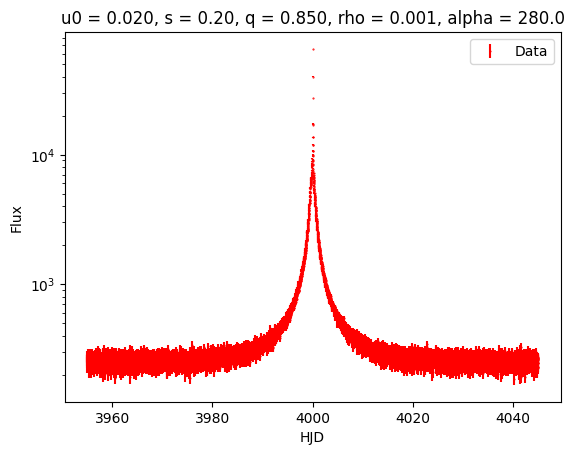

In [19]:
#convert magnification to flux with error

sourcemag = 16.0
sourceflux = mm.Utils.get_flux_from_mag(sourcemag)
gamma = 4.5
rdnoise = 12.12
darkcurr = 1.072
sky = 3.43
timeint = np.linspace(t_0 - gamma*t_E, t_0 + gamma*t_E, int(2.*gamma*t_E*1440./15.))
lcmag = planet.get_lc(timeint, source_flux=sourceflux, blend_flux=0.0)
lcflux = mm.Utils.get_flux_from_mag(lcmag)
lcerror = np.random.normal(lcflux, np.sqrt(lcflux + darkcurr + sky + rdnoise**2), len(lcflux))
lcerrorbar = np.sqrt(lcflux + darkcurr + sky + rdnoise**2)
lcfluxerr = lcerror

#plot data with error bars
plt.figure()
plt.errorbar(timeint, lcfluxerr, yerr = lcerrorbar, fmt= 'o', color='red', label='Data', markersize=0.5)
plt.yscale('log')
plt.xlabel('HJD')
plt.ylabel('Flux')
plt.title('u0 = %.3f, s = %0.2f, q = %0.3f, rho = %0.3f, alpha = %0.1f'%(u_0,s,q,rho, alpha))
plt.legend(loc='best')
#plt.gca().invert_yaxis()
plt.show()

Get OGLE data and plot light curves

In [6]:
# system tools
import os
import sys
from io import StringIO
import shutil

# web scrapping tools
import bs4 as bs
import urllib
import urllib.request
import pandas as pd

#---

def get_data_url(event: str) -> str:
    '''Takes an event name and returns the URL for the data page.'''

    event = event.split('-') # split the event name into its components, seperated by '-'
    year = event[0]  # the first component is the year
    region = event[1].lower()  # the second component is region (e.g., blg or gd), which we need to make lower case.
    number = event[2]  #
    url = f'https://www.astrouw.edu.pl/ogle/ogle4/ews/{year}/{region}-{number}/phot.dat'

    return url

def get_param_url(event: str) -> str:
    '''Takes an event name and returns the URL for the parameter page.'''

    event = event.split('-') # split the event name into its components, seperated by '-'
    year = event[0]  # the first component is the year
    region = event[1].lower()  # the second component is region (e.g., blg or gd), which we need to make lower case.
    number = event[2]  #
    url = f'https://www.astrouw.edu.pl/ogle/ogle4/ews/{year}/{region}-{number}/params.dat'

    return url

def fetch_event_data(url: str) -> pd.DataFrame:
    '''Takes a url and returns the data as a pandas dataframe.'''

    # Read the data from the URL
    response = urllib.request.urlopen(url)
    data = response.read().decode('utf-8')

    # Convert the data to a pandas DataFrame
    #df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])
    df = pd.read_csv(StringIO(data), sep=r'\s+', header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])

    return df

#---

def fetch_table_data(url):
    '''Takes a URL and returns the first table as a pandas DataFrame.'''
    source = urllib.request.urlopen(url).read().decode('utf-8')
    df = pd.read_csv(StringIO(source), sep=r'\s+', header=5, names=['Parameter', 'Value', 'Error'])

    return df






In [12]:


event = '2012-BLG-0406'
url_data = get_data_url(event)
url_param = get_param_url(event)
data = fetch_event_data(url_data)
data['HJD'] = data['HJD'] - 2450000
params = fetch_table_data(url_param)
data_columns = ['HJD', 'I magnitude', 'magnitude error']
params_columns = ['Parameter', 'Value', 'Error']

data.to_csv(
    '../gulls_stuff/%s_data.txt'%event,          # output path
    columns=data_columns,  # only these columns
    sep='\t',              # delimiter (e.g. '\t', ',' or ' ')
    index=False,           # don’t write row numbers
    header=['HJD-2450000', 'I_Mag', 'Err']           # include the column names
)
params.to_csv(
    '../gulls_stuff/%s_params.txt'%event,          # output path
    columns=params_columns,  # only these columns
    sep='\t',              # delimiter (e.g. '\t', ',' or ' ')
    index=False,           # don’t write row numbers
    header=True            # include the column names
)

Text(0.5, 1.0, 'OGLE-2012-BLG-0406')

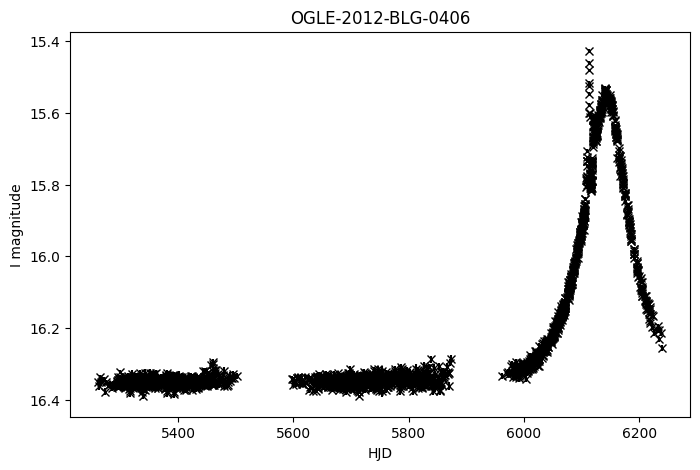

In [13]:
event = '2012-BLG-0406'
time, mag, magerr = np.loadtxt('../gulls_stuff/%s_data.txt'%event, delimiter='\t', skiprows=1, unpack=True)

plt.figure(figsize=(8, 5))
plt.errorbar(time,mag,yerr=magerr,fmt='x',color='black')
plt.xlabel('HJD')
plt.ylabel('I magnitude')
plt.gca().invert_yaxis()
plt.title('OGLE-%s' % event)

                  

In [10]:
ql = np.round(np.linspace(0.05, 1.0, 40), 2)
alphal = np.round(np.linspace(0., 360., 40, endpoint=False), 0)
print(alphal)

[  0.   9.  18.  27.  36.  45.  54.  63.  72.  81.  90.  99. 108. 117.
 126. 135. 144. 153. 162. 171. 180. 189. 198. 207. 216. 225. 234. 243.
 252. 261. 270. 279. 288. 297. 306. 315. 324. 333. 342. 351.]


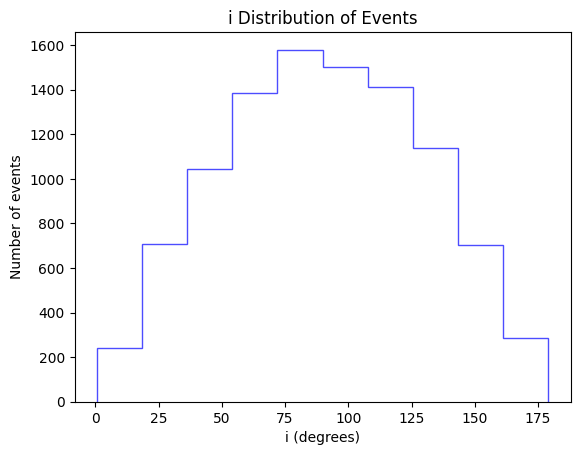

In [4]:
import numpy as np
import matplotlib.pyplot as plt
unicos = np.random.uniform(-1, 1, 10000)
i_dist = (180./np.pi)*np.arccos(unicos)

plt.hist(i_dist, bins=10, color='blue', alpha=0.7, histtype='step')
plt.xlabel('i (degrees)')
plt.ylabel('Number of events')
plt.title('i Distribution of Events')
plt.show()